In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from IPython.display import display, HTML

In [2]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [3]:
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.4)

### Point estimates

In [4]:
import statsmodels.api as sm

/Users/sergiynokhrin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
#http://statsmodels.sourceforge.net/0.6.0/datasets/generated/ccard.html
df = sm.datasets.ccard.load_pandas()

In [6]:
df.data.shape

(72, 5)

In [7]:
sm.datasets.ccard.DESCRSHORT

"William Greene's credit scoring data"

In [8]:
df.data.describe()

,AVGEXP,AGE,INCOME,INCOMESQ,OWNRENT
count,72.000000,72.000000,72.000000,72.000000,72.00000
mean,262.532083,31.277778,3.437083,14.661565,0.37500
std,318.046831,7.152705,1.699452,17.644929,0.48752
min,9.580000,20.000000,1.500000,2.250000,0.00000
25%,67.597500,26.000000,2.400000,5.760000,0.00000
50%,158.320000,30.000000,3.000000,9.000000,0.00000
75%,323.475000,36.000000,3.970000,15.761200,1.00000
max,1898.030000,55.000000,10.000000,100.000000,1.00000


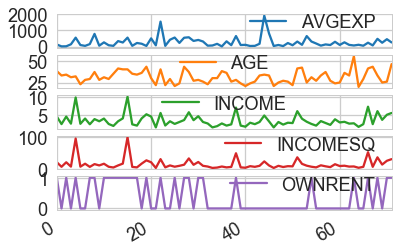

In [9]:
df.data.plot(subplots=True)
plt.show()

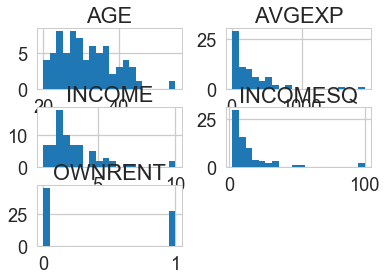

In [10]:
df.data.hist(bins=20)
plt.tight_layout
plt.show()

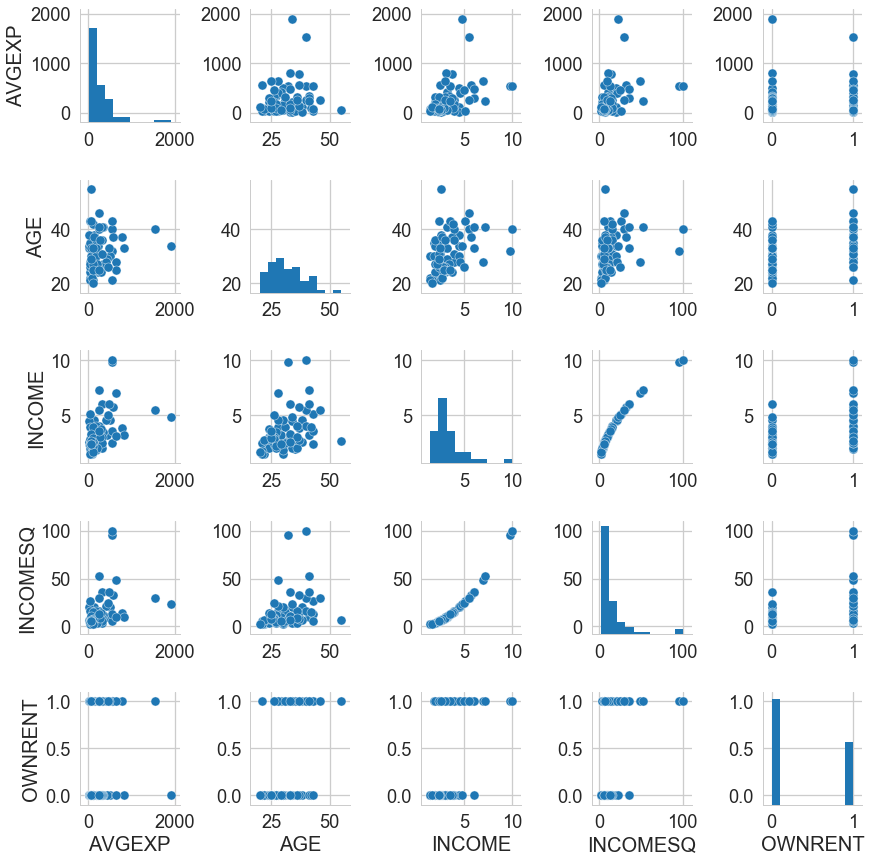

In [11]:
sns.pairplot(df.data)
plt.show()

In [12]:
#calculate average age:

In [13]:
cum_sum = 0.0
running_average = []

#for x in sorted(df.data.AGE):
for x in df.data.AGE:
    cum_sum += x
    running_average.append(cum_sum/(len(running_average)+1))

In [14]:
df.data.AGE.mean()

31.27777777777778

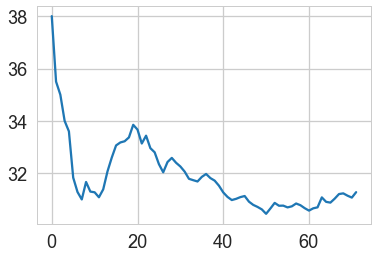

In [15]:
plt.plot(running_average)
plt.show()

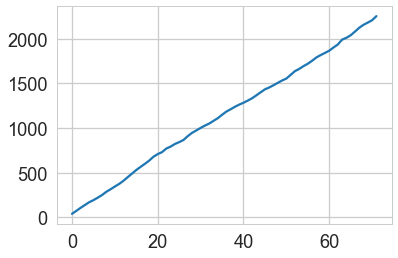

In [16]:
plt.plot(np.cumsum(df.data.AGE))
plt.show()

In [17]:
size= 20 
n_experiments = 100

sample_mean = []
sample_std = []
for e in range(n_experiments):
    sample = np.random.choice(df.data.AGE, 20)
    sample_mean.append(np.mean(sample))
    sample_std.append(np.std(sample))

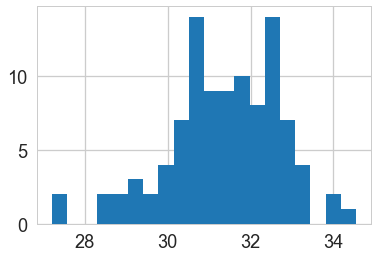

In [20]:
plt.hist(sample_mean, bins = 20)
plt.show()

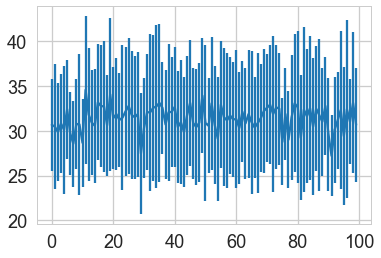

In [21]:
plt.errorbar(range(len(sample_mean)), sample_mean, yerr=sample_std)
plt.show()

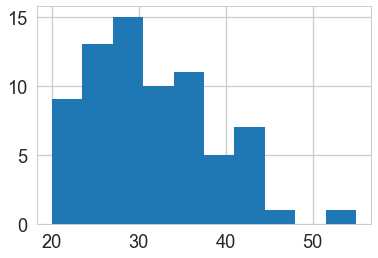

In [22]:
df.data.AGE.hist(bins=10)
plt.show()

In [23]:
np.random.choice(df.data.AGE, 20)

array([ 26.,  27.,  25.,  46.,  26.,  25.,  21.,  28.,  37.,  38.,  37.,
        30.,  21.,  29.,  24.,  26.,  26.,  35.,  25.,  33.])

## Compare stds

### Sum of variables

The distribution of sample mean is approximately normal. The approximation can be poor if the sample size is small, but it improves with larger sample sizes.

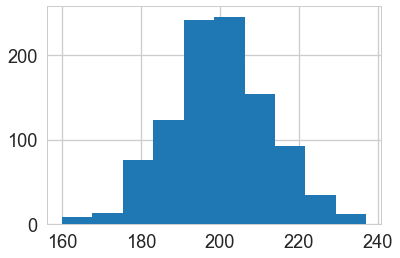

In [24]:
plt.hist([sum(stats.bernoulli.rvs(0.2, size=1000)) for x in range(1000) ])
plt.show()

In [25]:
import math


In [26]:
1/math.sqrt(3)

0.5773502691896258

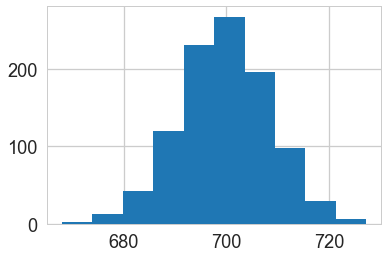

In [27]:
plt.hist([sum(stats.uniform.rvs(0.2, size=1000)) for x in range(1000) ])
plt.show()

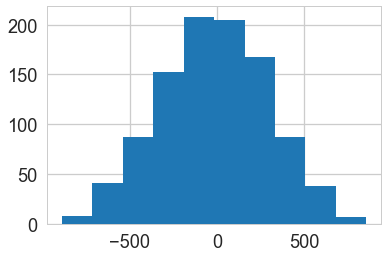

In [28]:
plt.hist([sum(stats.norm.rvs(0.0, 10, size=1000)) for x in range(1000) ])
plt.show()

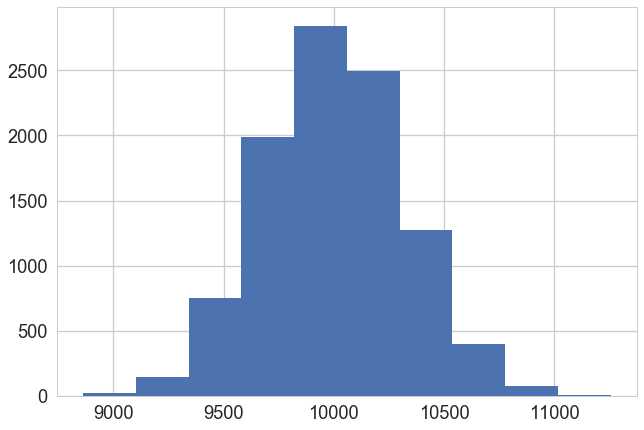

In [188]:
plt.hist([sum(stats.expon.rvs(0.0, 10, size=1000)) for x in range(10000) ])
plt.show()